# Observations and Insights¶
1. With a Correlation of coefficient of 0.84, there is a positive relationship between tumor volume and subject mice 
   weight The rate of the tumor increases with the weight of the mouse.
2. Capomulin and Ramicane had the most success in the final treatment of mice subjects to reduce the tumor.
3. The line plot shows, Capomulin had an overall positive effect in decreasing the tumor volume with the drug on mice
   subjects within 45 days.
4. More mice were tested with the regimen Capomulin and Ramicane.
5. Regimen Propriva has a lower mean than Infubinol but Infubinol was selected as the top 4 drugs.  I believe it is
   because SEM of Infubinol is smaller than Propriva which would give the sample data mean a more correct reading of 
   the true population mean.
  

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()
# Combine the data into a single dataset
mouse_study_data = pd.merge( study_results,mouse_metadata,on='Mouse ID',how='left' )
#mouse_study_data.shape[0]

# Checking the number of mice in the DataFrame.
len(mouse_study_data["Mouse ID"].unique())


# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_id = mouse_study_data.loc[mouse_study_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id

# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = mouse_study_data.loc[mouse_study_data['Mouse ID']== duplicate_mouse_id[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_data = mouse_study_data[mouse_study_data['Mouse ID'].isin(duplicate_mouse_id)==False]

In [53]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
mean = clean_mouse_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_mouse_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_mouse_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std = clean_mouse_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_mouse_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_stats = pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation": std, "SEM": sem})
summary_stats.head()


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats =clean_mouse_data.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
summary_stats.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

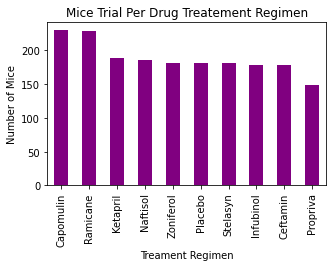

In [56]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

regimen_group = clean_mouse_data['Drug Regimen'].value_counts()

#index object
#regimen_group.index
#regimen_group.values
#regimen_group.index.values
plt.figure(figsize=(5,3))
treatment_regimen_chart = regimen_group.plot(kind='bar',color='purple')
plt.title('Mice Trial Per Drug Treatement Regimen')
#treatment_regimen_chart.set_xlabel('Treament Regimen') 
plt.xlabel('Treament Regimen')
plt.ylabel('Number of Mice') 

#plt.savefig("Images/barplot_pandas.png")
plt.show()


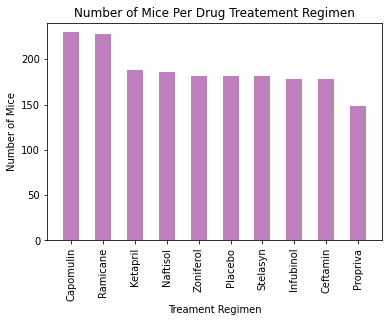

In [57]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = regimen_group.index.values
plt.bar(x_axis, regimen_group.values, color='purple', width=0.5,alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.title('Number of Mice Per Drug Treatement Regimen')
plt.xlabel('Treament Regimen') 
plt.ylabel('Number of Mice') 
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(regimen_group.values)+10)

#plt.savefig("Images/barplot_pyplot.png")
plt.show()


## Pie Plots

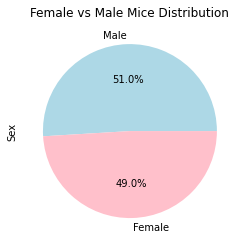

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Split up our data into groups based upon 'gender'
#gender_groups = clean_mouse_data.groupby('Sex').count()
gender_groups = clean_mouse_data['Sex'].value_counts()
#gender_groups.index.values


gender_pie = gender_groups.plot(kind='pie',autopct="%1.1f%%",colors = ['lightblue', 'pink'],
                                title='Female vs Male Mice Distribution')

#plt.savefig("Images/PyGender_pandas.png")
plt.show()

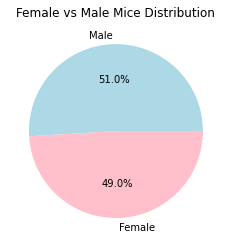

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ['lightblue','pink']
explode = (0.1,0)
labels = gender_groups.index.values

plt.pie(gender_groups.values,labels=labels, colors=colors,autopct="%1.1f%%")
plt.title('Female vs Male Mice Distribution')

#plt.savefig("Images/PyGender_pyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin, Ramicane, Infubinol, and Ceftamin

#Get the top 4 most promising treatement regimens
best_regimen = clean_mouse_data[clean_mouse_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

#create a new table with only needed columns
best_regimen = best_regimen[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]

#sort the new table start to final Timepoint to retrieve the final tumor volume
best_regimen = best_regimen.sort_values(['Timepoint'],ascending=True)
best_regimen

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,b128,Capomulin,0,45.000000
221,q483,Ceftamin,0,45.000000
220,o287,Ceftamin,0,45.000000
219,b487,Ceftamin,0,45.000000
218,p438,Ceftamin,0,45.000000
...,...,...,...,...
1802,e476,Infubinol,45,62.435404
1804,a203,Infubinol,45,67.973419
1806,f345,Infubinol,45,60.918767
1810,l471,Ceftamin,45,67.748662


In [61]:
#Get the final tumor volume for each mouse by group 'Drug Regimen then 'Mouse ID'
final_tumor_vol = best_regimen.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
final_tumor_vol.head

<bound method NDFrame.head of Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64>

In [62]:
#convert the final tumor volume data into a dataframe
final_tumor_vol_data = final_tumor_vol.to_frame()
final_tumor_vol_data = final_tumor_vol_data.reset_index()

In [63]:
# Capomulin Final Tumor Volume 
capomulin_tumor = final_tumor_vol_data.loc[final_tumor_vol_data['Drug Regimen'] == 'Capomulin']
capomulin_tumor.head()

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220


In [64]:
#Calculate the IQR

quartiles = capomulin_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin values below {lower_bound} could be outliers and above {upper_bound} could be outliers.")

Capomulin values below 20.70456164999999 could be outliers and above 51.83201549 could be outliers.


In [65]:
# Ramicane Final Tumor Volume
ramicane_tumor = final_tumor_vol_data.loc[final_tumor_vol_data['Drug Regimen'] == 'Ramicane']
ramicane_tumor.head()

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
75,Ramicane,a411,38.407618
76,Ramicane,a444,43.047543
77,Ramicane,a520,38.810366
78,Ramicane,a644,32.978522
79,Ramicane,c458,38.342008


In [66]:
quartiles = ramicane_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane values below {lower_bound} could be outliers and above {upper_bound} could be outliers.")

Ramicane values below 17.912664470000003 could be outliers and above 54.30681135 could be outliers.


In [67]:
#Infubinol Final Tumor Volume
infubinol_tumor = final_tumor_vol_data.loc[final_tumor_vol_data['Drug Regimen'] == 'Infubinol']
infubinol_tumor.head()

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
50,Infubinol,a203,67.973419
51,Infubinol,a251,65.525743
52,Infubinol,a577,57.031862
53,Infubinol,a685,66.083066
54,Infubinol,c139,72.226731


In [68]:
quartiles = infubinol_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol values below {lower_bound} could be outliers and above {upper_bound} could be outliers.")

Infubinol values below 36.83290494999999 could be outliers and above 82.74144559000001 could be outliers.


In [69]:
#Ceftamin Final Tumor Volume
ceftamin_tumor = final_tumor_vol_data.loc[final_tumor_vol_data['Drug Regimen'] == 'Ceftamin']
ceftamin_tumor.head()

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
25,Ceftamin,a275,62.999356
26,Ceftamin,b447,45.000000
27,Ceftamin,b487,56.057749
28,Ceftamin,b759,55.742829
29,Ceftamin,f436,48.722078


In [70]:
quartiles = ceftamin_tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin values below {lower_bound} could be outliers and above {upper_bound} could be outliers.")

Ceftamin values below 25.355449580000002 could be outliers and above 87.66645829999999 could be outliers.


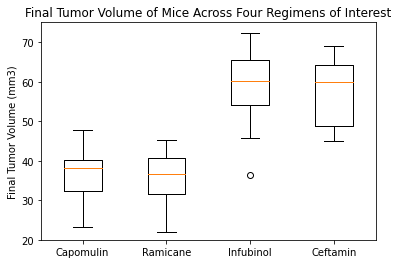

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_four = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_df = final_tumor_vol_data.reset_index()
tumor_vol_list = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_vol_list_df = pd.DataFrame(tumor_vol_list)

tumor_vol_list_df = tumor_vol_list_df.reindex(final_four)
tumor_vols = [vol for vol in tumor_vol_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels = final_four)
plt.ylim(20, 75)
plt.title('Final Tumor Volume of Mice Across Four Regimens of Interest')
plt.ylabel('Final Tumor Volume (mm3)')

#plt.savefig("Images/boxplot.png")
plt.show()


## Line and Scatter Plots

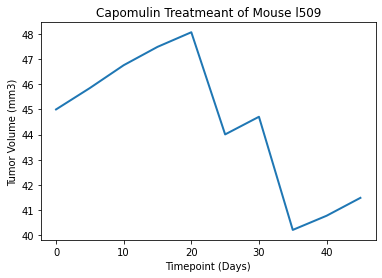

In [72]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_data = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin",:]
capomulin_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == 'l509',:]

timepoint = capomulin_mouse["Timepoint"]
tumor_volume = capomulin_mouse["Tumor Volume (mm3)"]

plt.title('Capomulin Treatmeant of Mouse l509')
plt.plot(timepoint,tumor_volume,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
#plt.savefig('Images/capomulin_linechart.png')
plt.show()


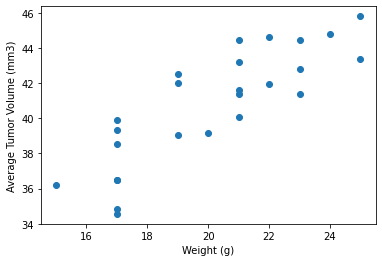

In [73]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Pull values for x and y values
#mouse_weight =capomulin_mice.groupby(capomulin_mice["Mouse ID"])["Weight (g)"].mean()
#tumor_volume = capomulin_mice.groupby(capomulin_mice["Mouse ID"])["Tumor Volume (mm3)"].mean()

capomulin_avg = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#plt.savefig("Images/capomulin_scatterplot.png")
plt.show()


## Correlation and Regression

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [75]:
model = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

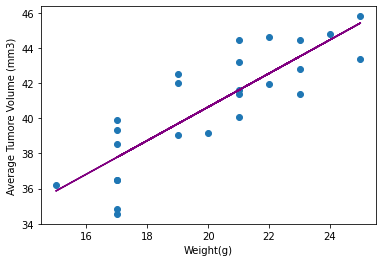

In [76]:
#Create equation of line to predict rate of tumor/weight of mouse
# Y = mX + b
mslope = 0.9544396890241045
bintercept = 21.552160532685015
y_values = capomulin_avg['Weight (g)'] * mslope + bintercept

# Plot the linear model on top of scatter plot
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'], y_values, color="purple")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

#plt.savefig('Images/capomulin_linearregression.png')
plt.show()
